# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [296]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Error:

	'NoneType' object has no attribute 'groups'

To report issues, please visit https://github.com/wkentaro/gdown/issues.
Error:

	'NoneType' object has no attribute 'groups'

To report issues, please visit https://github.com/wkentaro/gdown/issues.
Error:

	'NoneType' object has no attribute 'groups'

To report issues, please visit https://github.com/wkentaro/gdown/issues.


In [7]:
data = pd.read_csv('./train.csv')

In [8]:
data.tail()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0
5281,19,75.90,1375.6,Female,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,0


In [10]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [11]:
alphabet = [' ', '?', '.', '!', '', '&', '@', '#']
for sign in alphabet:
  data = data.replace(sign, np.nan)

In [12]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [13]:
data.dropna(inplace=True)

In [14]:
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

In [15]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'])

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [16]:
import seaborn as sns

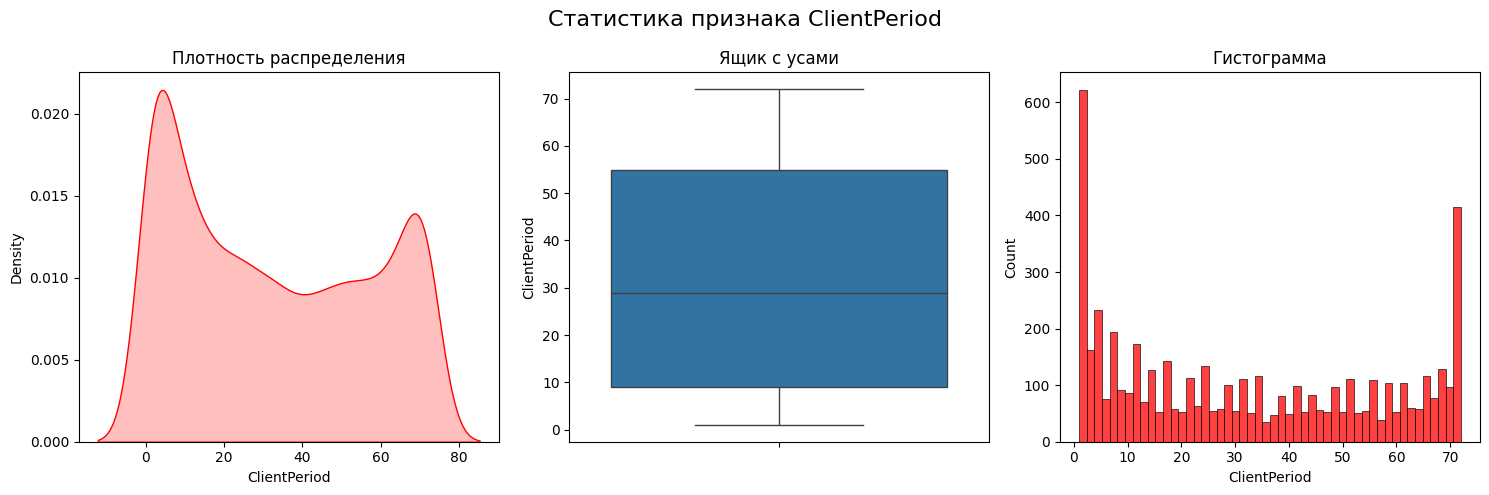

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Плотность распределения
sns.kdeplot(data=data['ClientPeriod'], fill = True, color='red', ax=axes[0])
axes[0].set_title('Плотность распределения')

# Ящик с усами
sns.boxplot(data=data['ClientPeriod'], ax=axes[1])
axes[1].set_title('Ящик с усами')

# Гистограмма
sns.histplot(data=data['ClientPeriod'], bins=50, color='red', ax=axes[2])
axes[2].set_title('Гистограмма')

fig.suptitle('Статистика признака ClientPeriod', fontsize=16)

# Отображение графиков
plt.tight_layout()
plt.show()

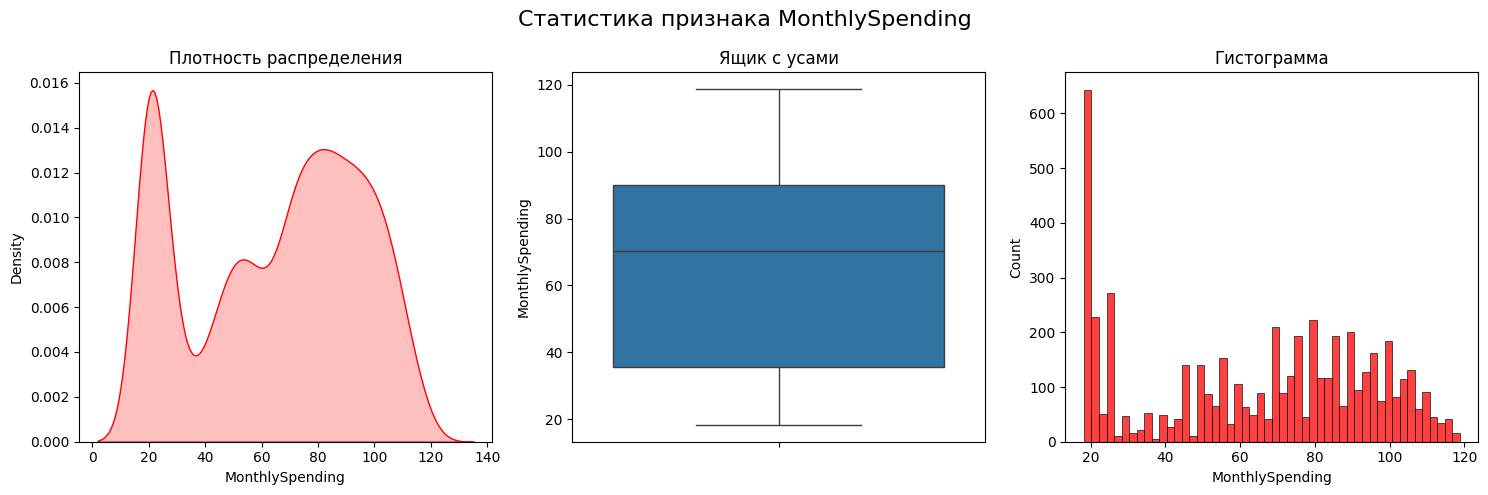

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Плотность распределения
sns.kdeplot(data=data['MonthlySpending'], fill = True, color='red', ax=axes[0])
axes[0].set_title('Плотность распределения')

# Ящик с усами
sns.boxplot(data=data['MonthlySpending'], ax=axes[1])
axes[1].set_title('Ящик с усами')

# Гистограмма
sns.histplot(data=data['MonthlySpending'], bins=50, color='red', ax=axes[2])
axes[2].set_title('Гистограмма')

fig.suptitle('Статистика признака MonthlySpending', fontsize=16)

# Отображение графиков
plt.tight_layout()
plt.show()

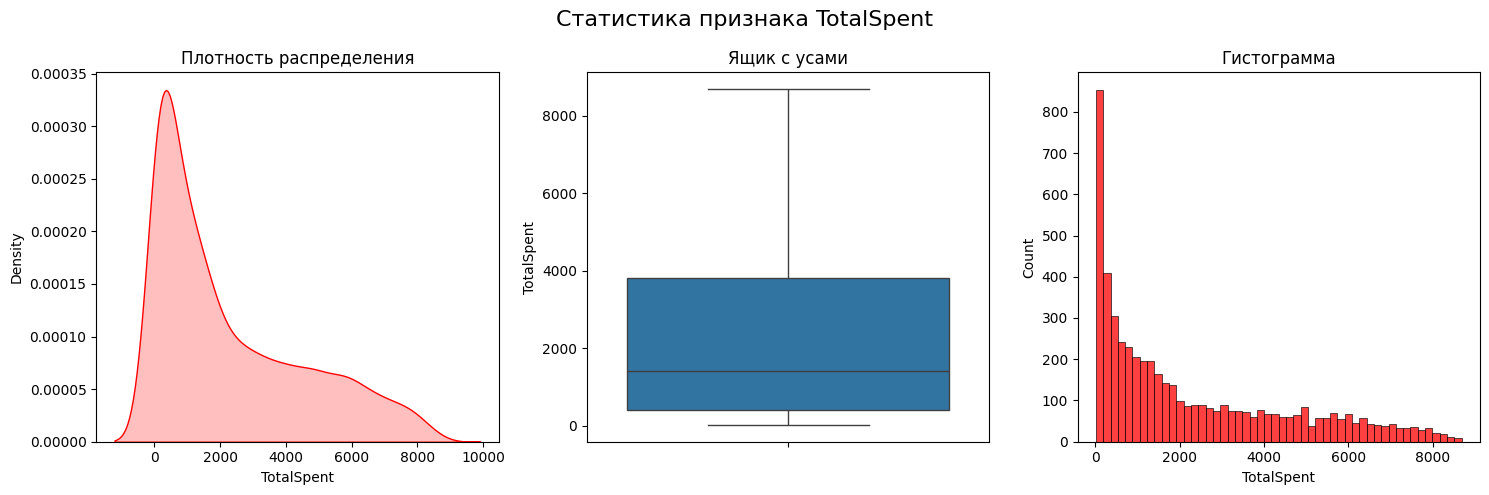

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Плотность распределения
sns.kdeplot(data=data['TotalSpent'], fill = True, color='red', ax=axes[0])
axes[0].set_title('Плотность распределения')

# Ящик с усами
sns.boxplot(data=data['TotalSpent'], ax=axes[1])
axes[1].set_title('Ящик с усами')

# Гистограмма
sns.histplot(data=data['TotalSpent'], bins=50, color='red', ax=axes[2])
axes[2].set_title('Гистограмма')

fig.suptitle('Статистика признака TotalSpent', fontsize=16)

# Отображение графиков
plt.tight_layout()
plt.show()

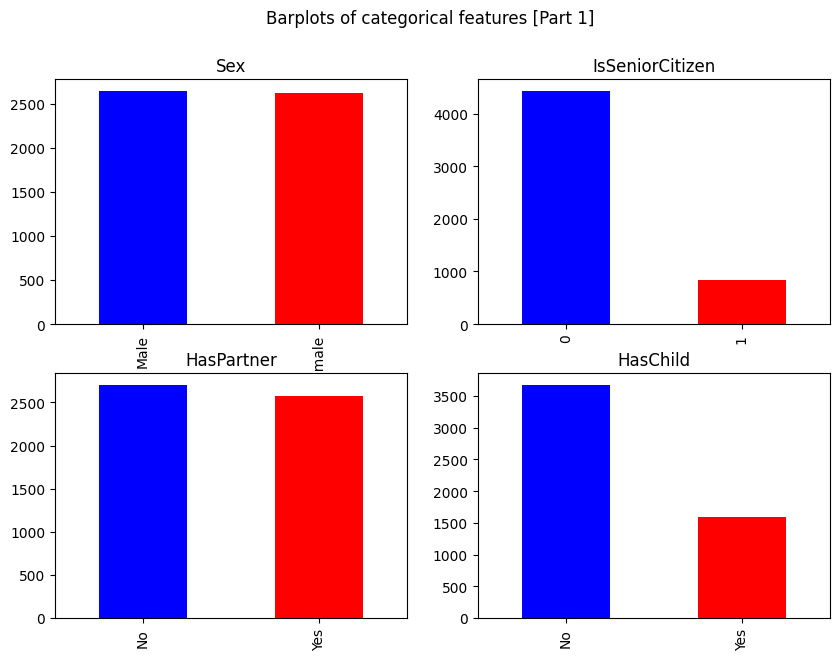

In [20]:
cat_cols_counts = [0] * len(cat_cols)
for i in range(len(cat_cols)):
  cat_cols_counts[i] = data[cat_cols[i]].value_counts()

fig, ax = plt.subplots(2,2, figsize=(10,7))
fig.suptitle('Barplots of categorical features [Part 1]')

ctr = 0

for i in range(2):
  for j in range(2):
    cat_cols_counts[ctr].plot(kind='bar', ax=ax[i, j], color=['blue', 'red'])
    ax[i,j].set_title(cat_cols[ctr])
    ctr += 1

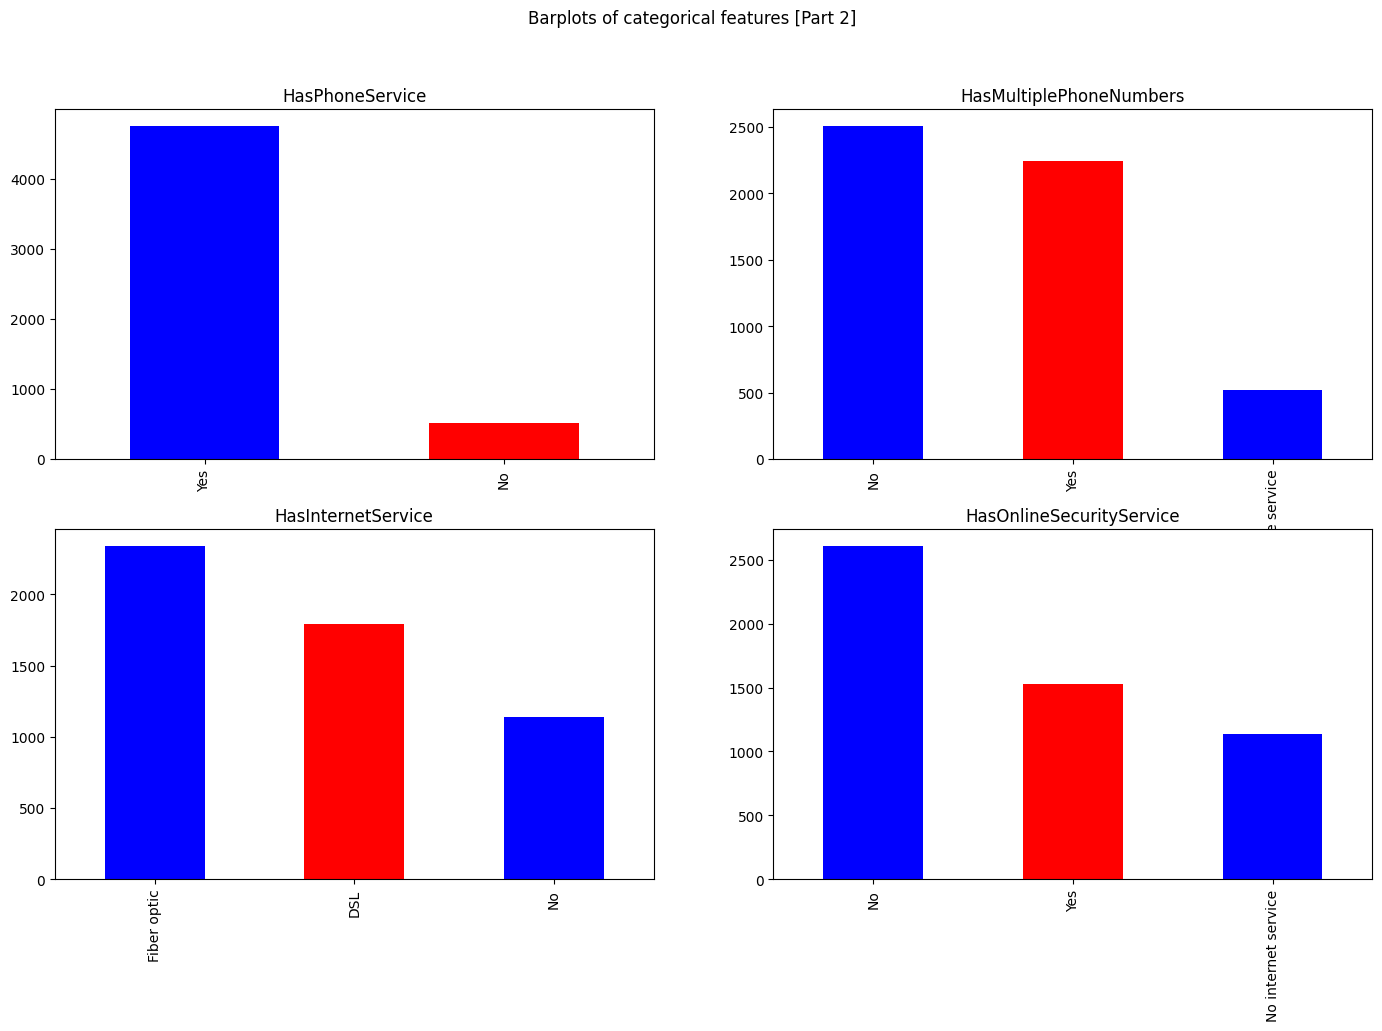

In [21]:
fig, ax = plt.subplots(2,2, figsize=(17,10))
fig.suptitle('Barplots of categorical features [Part 2]')


for i in range(2):
  for j in range(2):
    cat_cols_counts[ctr].plot(kind='bar', ax=ax[i, j], color=['blue', 'red'])
    ax[i,j].set_title(cat_cols[ctr])
    ctr += 1

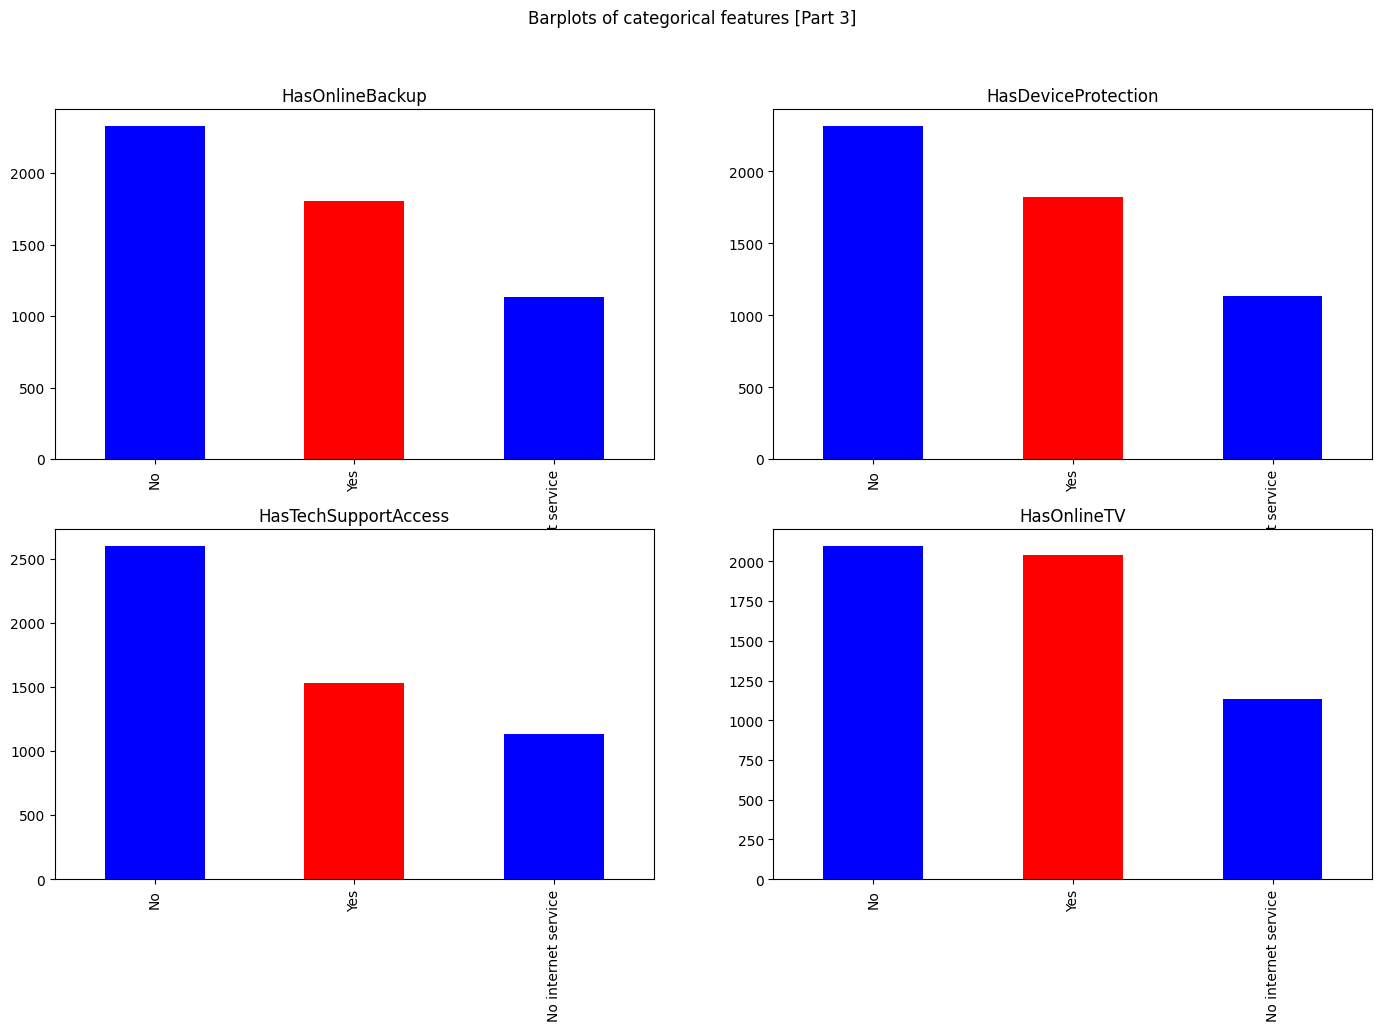

In [22]:
fig, ax = plt.subplots(2,2, figsize=(17,10))
fig.suptitle('Barplots of categorical features [Part 3]')


for i in range(2):
  for j in range(2):
    cat_cols_counts[ctr].plot(kind='bar', ax=ax[i, j], color=['blue', 'red'])
    ax[i,j].set_title(cat_cols[ctr])
    ctr += 1

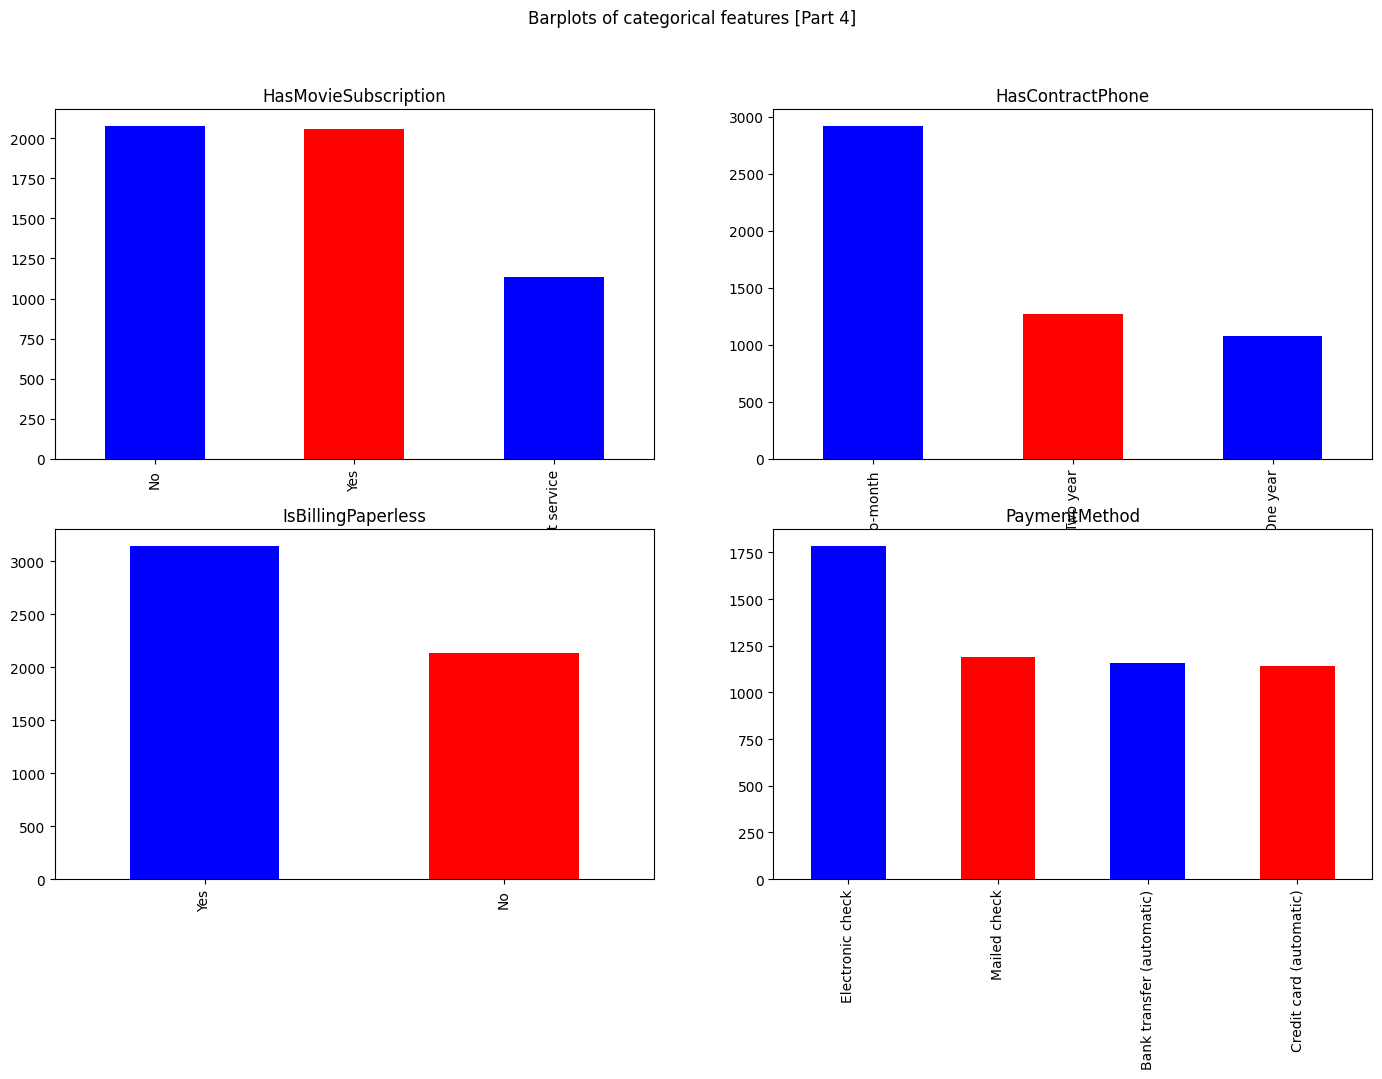

In [23]:
fig, ax = plt.subplots(2,2, figsize=(17,10))
fig.suptitle('Barplots of categorical features [Part 4]')


for i in range(2):
  for j in range(2):
    cat_cols_counts[ctr].plot(kind='bar', ax=ax[i, j], color=['blue', 'red'])
    ax[i,j].set_title(cat_cols[ctr])
    ctr += 1

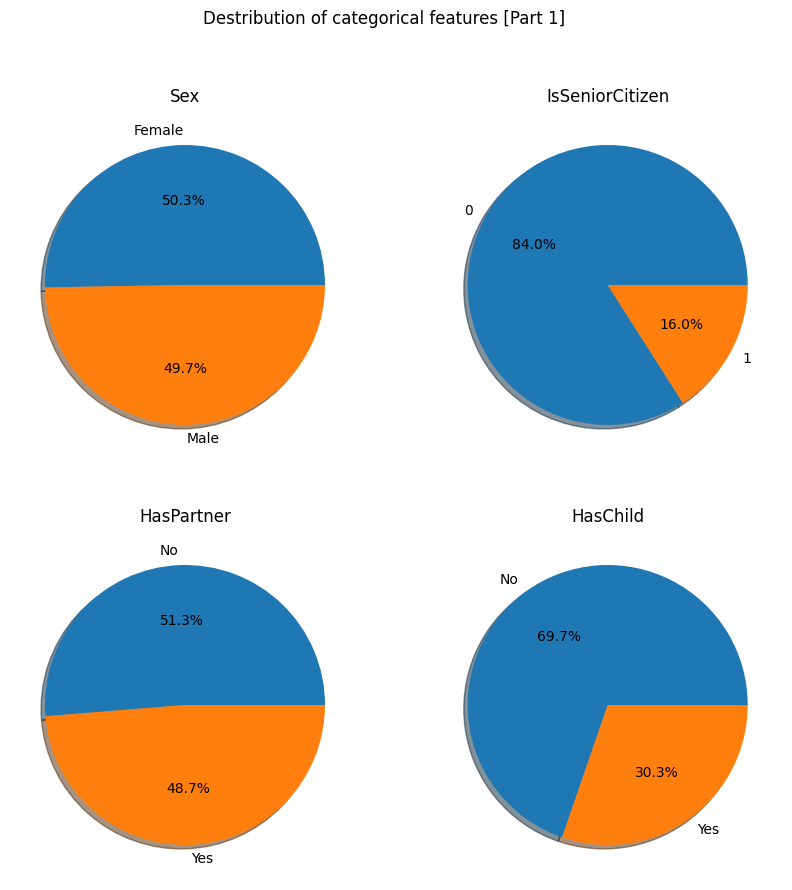

In [24]:
cat_col_values = [0] * len(cat_cols)
for i in range(len(cat_cols)):
    cat_col_values[i] = [j for j in data[cat_cols[i]].value_counts()]
cat_col_labels = [0] * len(cat_cols)
for i in range(len(cat_cols)):
    cat_col_labels[i] = set(data[cat_cols[i]].tolist())
ctr = 0
fig, ax = plt.subplots(2,2, figsize=(10,10))
fig.suptitle('Destribution of categorical features [Part 1]')

for i in range(2):
    for j in range(2):
        ax[i,j].pie(cat_col_values[ctr], labels=cat_col_labels[ctr], autopct='%.1f%%', shadow=True, radius=1)
        ax[i,j].set_title(cat_cols[ctr])
        ctr += 1

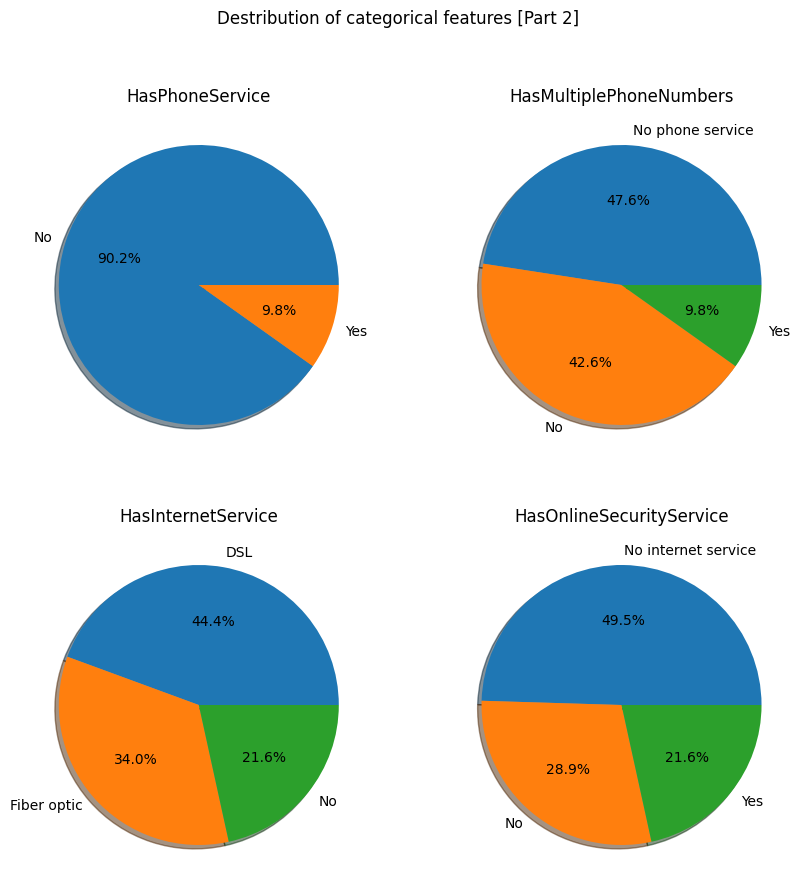

In [25]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
fig.suptitle('Destribution of categorical features [Part 2]')

for i in range(2):
    for j in range(2):
        ax[i,j].pie(cat_col_values[ctr], labels=cat_col_labels[ctr], autopct='%.1f%%', shadow=True, radius=1)
        ax[i,j].set_title(cat_cols[ctr])
        ctr += 1

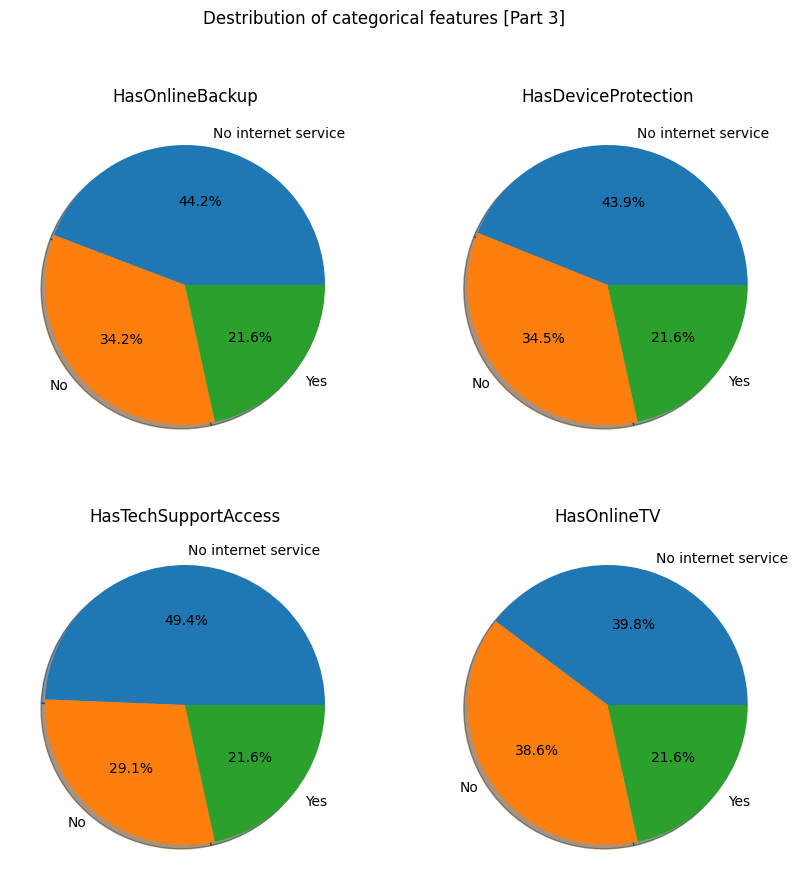

In [26]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
fig.suptitle('Destribution of categorical features [Part 3]')

for i in range(2):
    for j in range(2):
        ax[i,j].pie(cat_col_values[ctr], labels=cat_col_labels[ctr], autopct='%.1f%%', shadow=True, radius=1)
        ax[i,j].set_title(cat_cols[ctr])
        ctr += 1

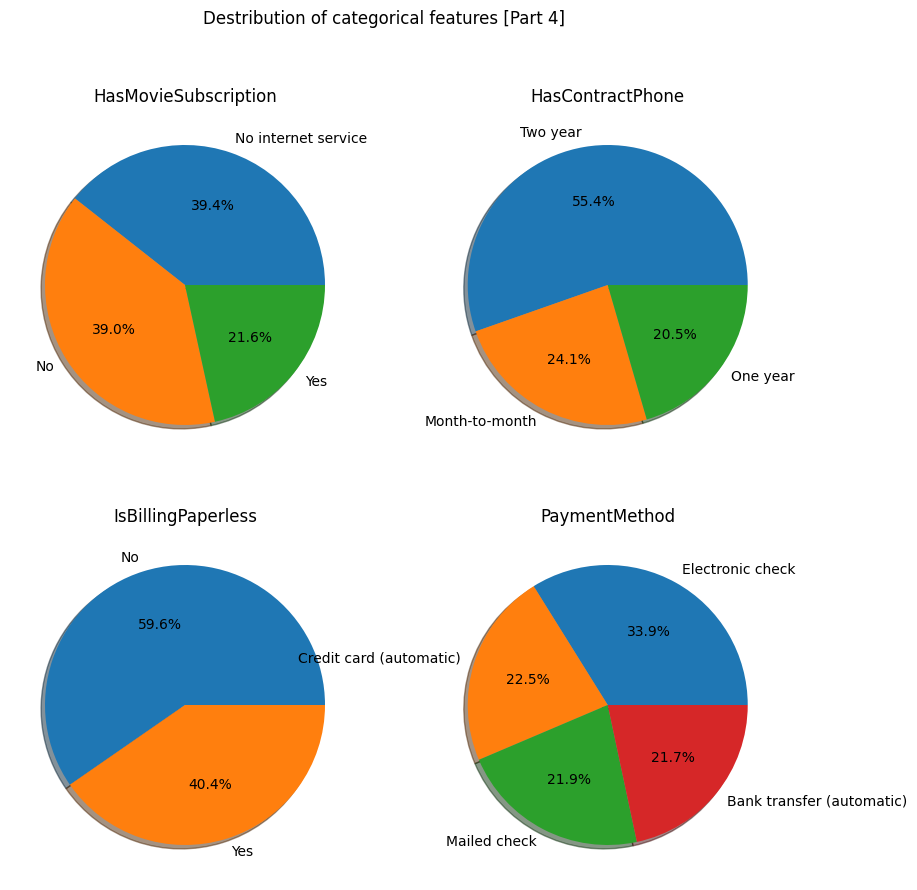

In [27]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
fig.suptitle('Destribution of categorical features [Part 4]')

for i in range(2):
    for j in range(2):
        ax[i,j].pie(cat_col_values[ctr], labels=cat_col_labels[ctr], autopct='%.1f%%', shadow=True, radius=1)
        ax[i,j].set_title(cat_cols[ctr])
        ctr += 1

In [313]:
X_with_target = data[feature_cols+[target_col]].copy()

In [317]:
corr = X_with_target.corr()
corr

<ipython-input-317-8bb84a82f744>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = X_with_target.corr()


,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
ClientPeriod,1.000000,0.248583,0.826332,0.010597,-0.352613
MonthlySpending,0.248583,1.000000,0.652034,0.215202,0.184341
TotalSpent,0.826332,0.652034,1.000000,0.093987,-0.201294
IsSeniorCitizen,0.010597,0.215202,0.093987,1.000000,0.156502
Churn,-0.352613,0.184341,-0.201294,0.156502,1.000000


## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [203]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [204]:
X = data[feature_cols]
y = data[target_col]

In [205]:
Encoder_set = ['Sex', 'HasPartner', 'HasChild', 'HasPhoneService']
dummy_set = list(set(cat_cols).difference(Encoder_set))

In [206]:
X_encoder = X[Encoder_set]
X_dummy = X[dummy_set]
X_num = X[num_cols]

In [207]:
encoder = LabelEncoder()
for col in Encoder_set:
  encoder.fit(X_encoder[col])
  X_encoder[col] = encoder.transform(X_encoder[col])

<ipython-input-207-4b4c1049f47e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_encoder[col] = encoder.transform(X_encoder[col])
<ipython-input-207-4b4c1049f47e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_encoder[col] = encoder.transform(X_encoder[col])
<ipython-input-207-4b4c1049f47e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [208]:
X_dummy = pd.get_dummies(X_dummy)

In [209]:
X = pd.concat([X_num, X_encoder, X_dummy], axis=1)

In [210]:
X

,ClientPeriod,MonthlySpending,TotalSpent,Sex,HasPartner,HasChild,HasPhoneService,IsSeniorCitizen,IsBillingPaperless_No,IsBillingPaperless_Yes,...,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes
0,55,19.50,1026.35,1,1,1,1,0,1,0,...,0,1,0,0,0,0,1,1,0,0
1,72,25.85,1872.20,1,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,1,75.90,75.90,1,0,0,1,0,0,1,...,1,0,0,0,0,1,0,1,0,0
3,32,79.30,2570.00,0,1,0,1,1,1,0,...,1,0,0,0,0,0,1,0,0,1
4,60,115.25,6758.45,0,1,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
5278,50,44.45,2188.45,1,1,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
5279,1,55.05,55.05,1,0,0,1,0,1,0,...,1,0,0,0,0,0,1,1,0,0
5280,29,76.00,2215.25,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1


In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [212]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [213]:
X_train.head(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,HasPartner,HasChild,HasPhoneService,IsSeniorCitizen,IsBillingPaperless_No,IsBillingPaperless_Yes,...,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes
3284,-0.384961,0.518064,-0.259827,1,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,1
3190,-0.797559,0.604555,-0.572784,1,0,0,1,0,0,1,...,1,0,0,0,0,1,0,1,0,0
3958,-1.251416,0.724311,-0.948810,0,0,0,1,1,0,1,...,1,0,0,0,0,1,0,0,0,1
2771,0.275196,0.697699,0.496931,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
4229,-0.508740,-1.439622,-0.815806,1,0,1,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0


In [198]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_auc(y_test_true, y_test_pred_probs, y_train_true=None, y_train_pred_probs=None):
    """
    Рисует ступенчатую ROC-AUC кривую для данных обучения и тестирования с заполненной областью под ней.

    Параметры:
     - y_train_true: Настоящие метки классов для данных обучения.
     - y_train_pred_probs: Предсказанные вероятности принадлежности к классу 1 для данных обучения.
     - y_test_true: Настоящие метки классов для данных тестирования.
     - y_test_pred_probs: Предсказанные вероятности принадлежности к классу 1 для данных тестирования.
    """
    if y_train_true is not None:
      fpr_train, tpr_train, _ = roc_curve(y_train_true, y_train_pred_probs)
      roc_auc_train = auc(fpr_train, tpr_train)

    fpr_test, tpr_test, _ = roc_curve(y_test_true, y_test_pred_probs)
    roc_auc_test = auc(fpr_test, tpr_test)

    plt.figure(figsize=(8, 6))

    if y_train_true is not None:
      plt.step(fpr_train, tpr_train, color='red', lw=1, label='Train ROC curve (area = %0.2f)' % roc_auc_train)
      plt.fill_between(fpr_train, tpr_train, color='pink', alpha=0.75)

    plt.step(fpr_test, tpr_test, color='green', lw=1, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
    plt.fill_between(fpr_test, tpr_test, color='lightgreen', alpha=0.75)

    print("sds")
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
grid = {
    'C': [1000, 100, 10, 1, 0.1, 0.01],
}

grid = GridSearchCV(LogisticRegression(), grid, cv=10, scoring='roc_auc')
grid.fit(X_train, y_train)

In [259]:
grid.best_params_

{'C': 100}

sds


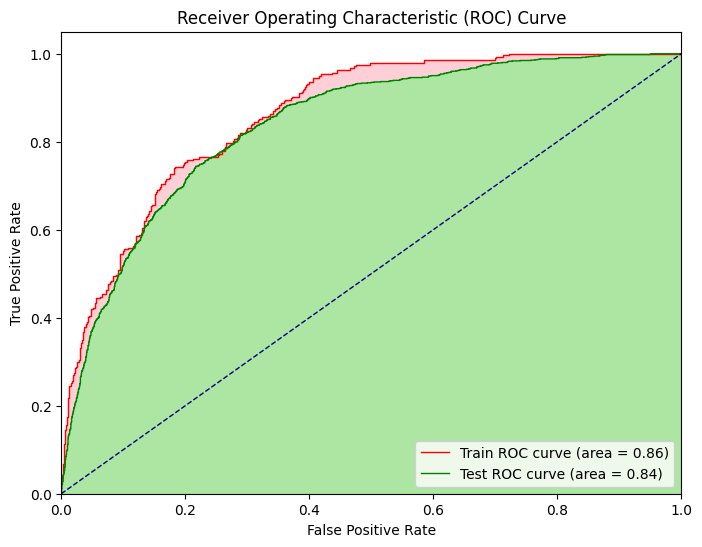

In [216]:
plot_roc_auc(y_test, grid.predict_proba(X_test)[:,1], y_train, grid.predict_proba(X_train)[:,1])

In [ ]:
grid = {
    'solver' : ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
}

grid = GridSearchCV(LogisticRegressionCV(), grid, cv=None, scoring='roc_auc')
grid.fit(X_train, y_train.values.ravel())

In [218]:
grid.best_params_

{'solver': 'saga'}

sds


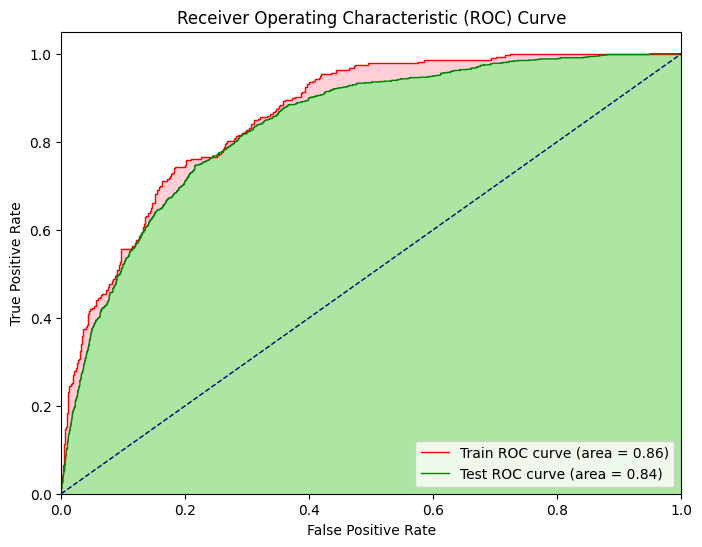

In [219]:
plot_roc_auc(y_test, grid.predict_proba(X_test)[:,1], y_train, grid.predict_proba(X_train)[:,1])

In [ ]:
model = LogisticRegressionCV(scoring='roc_auc', refit=True)
model.fit(X_train, y_train)

sds


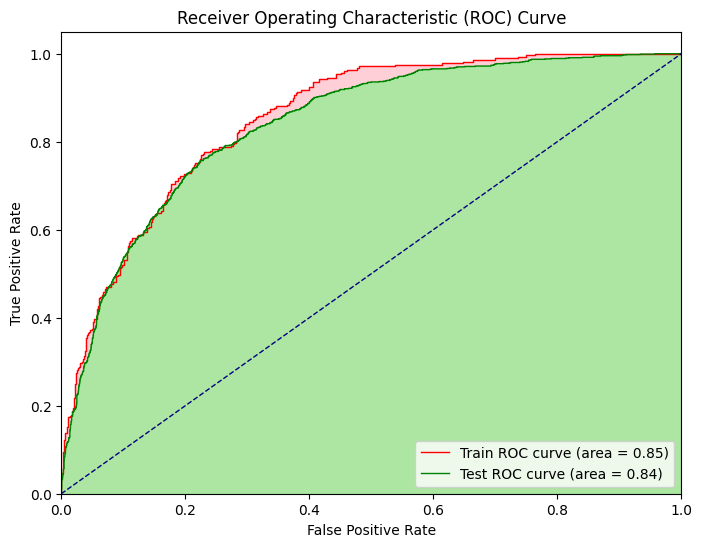

In [223]:
plot_roc_auc(y_test, model.predict_proba(X_test)[:,1], y_train, model.predict_proba(X_train)[:,1])

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество которое я получил это 0.84 при любом их трех вариантов (чистый LogisticRegression, LogisticRegressionCV с гридсерчем и с параметрами которые рекомендовали в описании)

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [143]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 3.2 MB/s eta 0:00:00


In [236]:
X_cb = data[feature_cols]
y_cb = data[target_col]

In [237]:
X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(X_cb, y_cb, train_size=0.2)

In [ ]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier()
cb.fit(X_train_cb, y_train_cb,cat_features=cat_cols)

sds


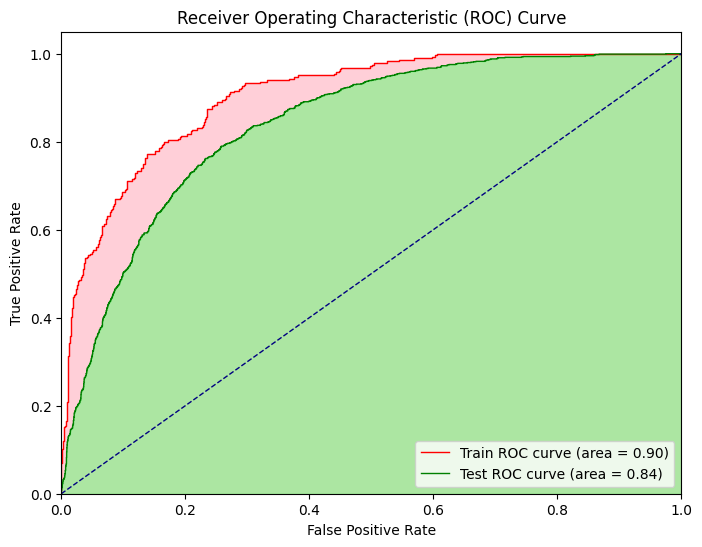

In [240]:
plot_roc_auc(y_test_cb, cb.predict_proba(X_test_cb)[:,1], y_train_cb, cb.predict_proba(X_train_cb)[:,1])

In [293]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(iterations=750, learning_rate=0.01, depth=4, loss_function='MultiClass', random_state=42)
cb.fit(X_train_cb, y_train_cb, cat_features=cat_cols)

0:	learn: 0.6898386	total: 4.92ms	remaining: 3.69s
1:	learn: 0.6862734	total: 10.5ms	remaining: 3.93s
2:	learn: 0.6830947	total: 15.1ms	remaining: 3.75s
3:	learn: 0.6797362	total: 19.4ms	remaining: 3.62s
4:	learn: 0.6760314	total: 25.1ms	remaining: 3.73s
5:	learn: 0.6724459	total: 29.6ms	remaining: 3.66s
6:	learn: 0.6689388	total: 34.3ms	remaining: 3.64s
7:	learn: 0.6655761	total: 38.8ms	remaining: 3.6s
8:	learn: 0.6625351	total: 43.6ms	remaining: 3.59s
9:	learn: 0.6592903	total: 48.4ms	remaining: 3.58s
10:	learn: 0.6562659	total: 52.9ms	remaining: 3.56s
11:	learn: 0.6534114	total: 57.5ms	remaining: 3.54s
12:	learn: 0.6508293	total: 62.2ms	remaining: 3.53s
13:	learn: 0.6484575	total: 65.6ms	remaining: 3.45s
14:	learn: 0.6457074	total: 68.9ms	remaining: 3.38s
15:	learn: 0.6428900	total: 73.6ms	remaining: 3.38s
16:	learn: 0.6400933	total: 78.2ms	remaining: 3.37s
17:	learn: 0.6371305	total: 82.8ms	remaining: 3.37s
18:	learn: 0.6342647	total: 87ms	remaining: 3.35s
19:	learn: 0.6315108	tota

sds


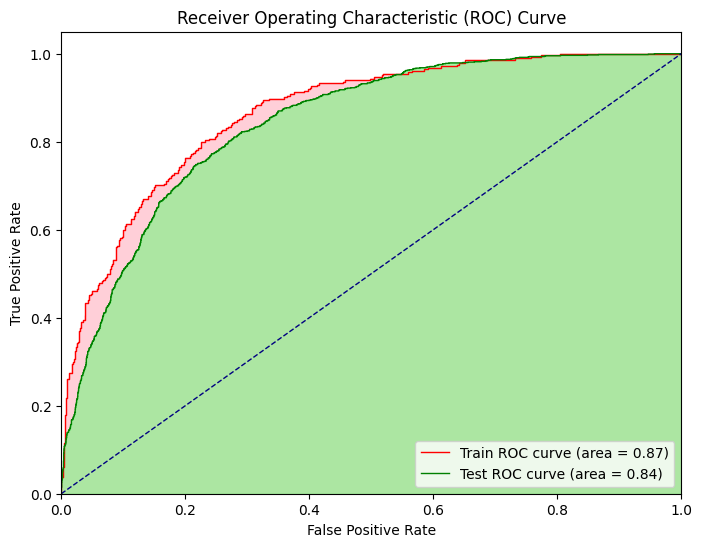

In [294]:
plot_roc_auc(y_test_cb, cb.predict_proba(X_test_cb)[:,1], y_train_cb, cb.predict_proba(X_train_cb)[:,1])

In [295]:
roc_auc_score(y_test_cb, cb.predict_proba(X_test_cb)[:,1])

0.8421787286134833

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ЛУчшее чего я добился это ROC_AUC 0.8421 с помощью catboost c параметрами: CatBoostClassifier(iterations=750, learning_rate=0.01, depth=4, loss_function='MultiClass', random_state=42)

# Предсказания

In [302]:
best_model = CatBoostClassifier(iterations=750, learning_rate=0.01, depth=4, loss_function='MultiClass', random_state=42)

In [ ]:
best_model.fit(X_train_cb, y_train_cb, cat_features=cat_cols)

In [304]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:,1]# используйте best_model.predict_proba(X_test), не забудьте выделить вероятность класса 1.
submission.to_csv('./my_submission.csv')

Лучшее решение отправьте в Stepik.